In [1]:
import tensorflow as tf

tf.__version__

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
train_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\train_data'
test_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\test_data'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagenerator = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
)

In [5]:
val_datagenerator = ImageDataGenerator()

In [6]:
test_datagenerator = ImageDataGenerator()

In [7]:
train_generator = train_datagenerator.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    batch_size=16,
    shuffle=True,
    class_mode='categorical'
)

Found 18169 images belonging to 3 classes.


In [8]:
print(train_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [9]:
val_generator = val_datagenerator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical'
)

Found 909 images belonging to 3 classes.


In [10]:
print(val_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [11]:
test_generator = test_datagenerator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical'
)

Found 909 images belonging to 3 classes.


In [12]:
print(test_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [13]:
# base_model = tf.keras.applications.ResNet50V2(
#     input_shape=(224,224,3),
#     include_top=False,
#     weights='imagenet',
#     pooling='avg'
# )


# #summary
# base_model.summary()

In [14]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)


#summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [15]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [17]:
class printLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_decayed_lr = self.model.optimizer._decayed_lr(tf.float32).numpy()
        print("current decayed lr: {:0.7f}".format(current_decayed_lr))

from tensorflow.keras.callbacks import ModelCheckpoint

initial_learning_rate = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                                                initial_learning_rate,
                                                decay_steps = 100,
                                                decay_rate = 0.96,
                                                staircase = False)

ckpt_modelpath = "./efficientnetB0.h5"

checkpointer = ModelCheckpoint(
    filepath=ckpt_modelpath,
    monitor='val_acc',
    verbose=1,
    save_best_only=True)


In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
             metrics =['acc'])

In [19]:
history = model.fit(train_generator, 
                   steps_per_epoch = len(train_generator),
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   callbacks = [printLR(), checkpointer])

Epoch 1/30
1136/1136 [==============================] - 1858s 2s/step - loss: 0.4256 - acc: 0.8320 - val_loss: 1.2304 - val_acc: 0.6293
current decayed lr: 0.0006289

Epoch 00001: val_acc improved from -inf to 0.62926, saving model to .\efficientnetB0.h5


C:\Users\SDH-LAB\anaconda3\envs\tf_nightly\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
1136/1136 [==============================] - 1847s 2s/step - loss: 0.2476 - acc: 0.9069 - val_loss: 1.5464 - val_acc: 0.6491
current decayed lr: 0.0003956

Epoch 00002: val_acc improved from 0.62926 to 0.64906, saving model to .\efficientnetB0.h5
Epoch 3/30
1136/1136 [==============================] - 1901s 2s/step - loss: 0.1665 - acc: 0.9380 - val_loss: 1.4567 - val_acc: 0.6645
current decayed lr: 0.0002488

Epoch 00003: val_acc improved from 0.64906 to 0.66447, saving model to .\efficientnetB0.h5
Epoch 4/30
1136/1136 [==============================] - 1891s 2s/step - loss: 0.1303 - acc: 0.9519 - val_loss: 1.4617 - val_acc: 0.6898
current decayed lr: 0.0001565

Epoch 00004: val_acc improved from 0.66447 to 0.68977, saving model to .\efficientnetB0.h5
Epoch 5/30
1136/1136 [==============================] - 1899s 2s/step - loss: 0.0980 - acc: 0.9627 - val_loss: 1.2997 - val_acc: 0.6876
current decayed lr: 0.0000984

Epoch 00005: val_acc did not improve from 0.68977
Epoch 6/3

Confusion Matrix
[[112 146  50]
 [ 99 155  47]
 [ 99 162  39]]


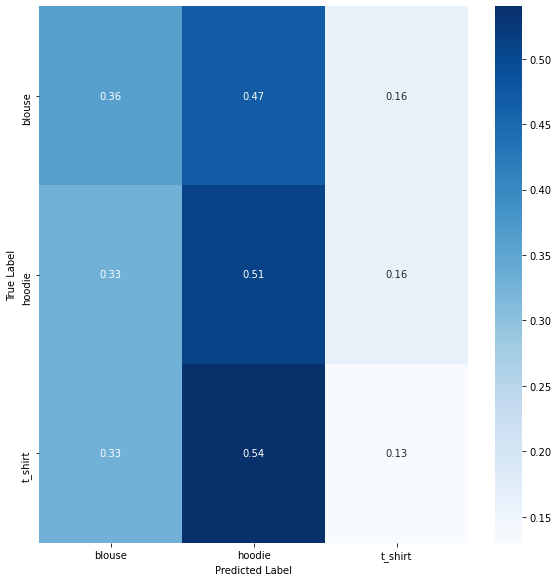

In [20]:
# confusion matrix
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, top_k_accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = test_generator.class_indices.keys()
print('Confusion Matrix')
con_mat = confusion_matrix(test_generator.classes, y_pred)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
print(con_mat)

con_mat_df = pd.DataFrame(con_mat_norm,
                         index = target_names,
                         columns = target_names)
figure = plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel('Predicted Label')
plt.show()

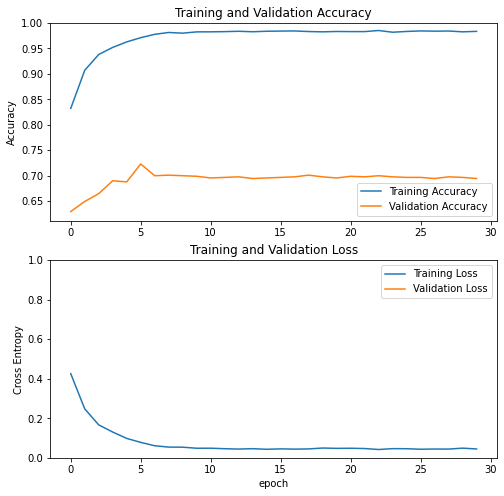

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [29]:
model.layers[0].summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________